In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
#pip install openpyxl

In [4]:
df = pd.read_csv('Iris.csv')
dt = df.drop(['Id'], axis=1) #ลบคอลัมน์ index
dt 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
X = dt.iloc[:,:-1] #.values 
y = dt.iloc[:,-1] #.values 

In [7]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #, random_state=48)

In [9]:
from sklearn.svm import SVC
#model = SVC(kernel='linear')
#model = SVC(kernel='linear', probability=True)
#model = SVC(kernel='poly', degree=3, gamma='auto')
model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict.reshape(-1, 1)


array([['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-versicolor'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-virginica'],
       ['Iris-setosa'],
       ['Iris-virginica'],
       ['Iris-setosa'],
 

In [10]:
#การป้อนข้อมูลพยากรณ์
pred1 = [[5.1,3.5,1.4,0.2],
         [5.9,3.0,5.1,1.8]]
         
df = model.predict(pred1)

i = 1
for m in range(len(df)):
    print('%d' %i, df[m])
    i += 1

1 Iris-setosa
2 Iris-virginica


C:\Users\Techatach\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [11]:
ypred = pd.DataFrame(y_predict)
data = ypred.rename(columns={0:'ข้อมูลพยากรณ์'})
data 

,ข้อมูลพยากรณ์
0,Iris-versicolor
1,Iris-setosa
2,Iris-virginica
3,Iris-setosa
4,Iris-virginica
5,Iris-virginica
6,Iris-versicolor
7,Iris-versicolor
8,Iris-versicolor
9,Iris-versicolor


In [12]:
ytest = pd.DataFrame(y_test).reset_index()
data2 = ytest.rename(columns={'Species':'ข้อมูลจริง'})
dt = data2.drop(['index'], axis=1) #ลบคอลัมน์ index
dt 

,ข้อมูลจริง
0,Iris-versicolor
1,Iris-setosa
2,Iris-virginica
3,Iris-setosa
4,Iris-virginica
5,Iris-virginica
6,Iris-versicolor
7,Iris-versicolor
8,Iris-versicolor
9,Iris-versicolor


In [13]:
#ตารางเปรียบเทียบข้อมูลจริงและการพยากรณ์
#total.to_csv('data.csv')
#total.to_excel('data.xlsx')

total = pd.concat([dt,data],axis=1) #.round(0)
total

,ข้อมูลจริง,ข้อมูลพยากรณ์
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-virginica,Iris-virginica
6,Iris-versicolor,Iris-versicolor
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [14]:
Xtest = X_test.reset_index()
ds = Xtest.drop(['index'], axis=1) #ลบคอลัมน์ index
sum = pd.concat([ds, total],axis=1) #.round(0)
sum

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,ข้อมูลจริง,ข้อมูลพยากรณ์
0,5.5,2.5,4.0,1.3,Iris-versicolor,Iris-versicolor
1,5.1,3.8,1.5,0.3,Iris-setosa,Iris-setosa
2,6.9,3.1,5.1,2.3,Iris-virginica,Iris-virginica
3,4.3,3.0,1.1,0.1,Iris-setosa,Iris-setosa
4,6.8,3.2,5.9,2.3,Iris-virginica,Iris-virginica
5,6.4,2.8,5.6,2.1,Iris-virginica,Iris-virginica
6,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor
7,5.5,2.4,3.7,1.0,Iris-versicolor,Iris-versicolor
8,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
9,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor


#### การสร้างไดอะแกรม SVM 

In [15]:
df = pd.read_csv('Iris.csv')
dt = df.drop(['Id'], axis=1) #ลบคอลัมน์ index

In [16]:
class_names = df['Species'].unique()
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Accuracy Score: 0.98
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]


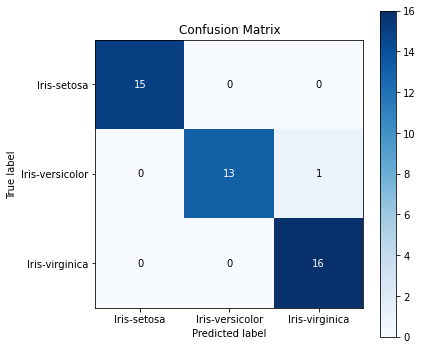

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_predict)))
#print('Accuracy Score:',accuracy_score(y_test, y_predict).round(2))
print(classification_report(y_test, y_predict, target_names=class_names))
cm = confusion_matrix(y_test, y_predict)
print(cm)

#pip install scikit-plot
import scikitplot as skplot
plt.rcParams['figure.figsize'] = 6,6 #10 x 10
skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show()

### การประเมินโมเดลแบบ cross_validation

In [ ]:
# from sklearn.model_selection import cross_val_score

# cvs = cross_val_score(model, X, y, cv=10)
# print('cross_val_scores = {}'.format(cvs))
# print('mean = {:4f}'.format(cvs.mean()))